# Startegi : Using each tagret one by one no normalization

In [29]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.linear_model import LinearRegression

In [2]:
path='data/train.csv'

In [3]:
df=pd.read_csv(path, index_col=0)
df=df[['x','y','z','x_sim','y_sim','z_sim']]
# df=df.drop('epoch', axis=1)
df.head()

,x,y,z,x_sim,y_sim,z_sim
id,,,,,,
0,-8855.823863,13117.780146,-20728.353233,-8843.131454,13138.221690,-20741.615306
1,-10567.672384,1619.746066,-24451.813271,-10555.500066,1649.289367,-24473.089556
2,-10578.684043,-10180.467460,-24238.280949,-10571.858472,-10145.939908,-24271.169776
3,-9148.251857,-20651.437460,-20720.381279,-9149.620794,-20618.200201,-20765.019094
4,-6719.092336,-28929.061629,-14938.907967,-6729.358857,-28902.271436,-14992.399986


In [4]:
mydata=df.copy()

In [5]:
mydata.isna().sum()

x        0
y        0
z        0
x_sim    0
y_sim    0
z_sim    0
dtype: int64

In [6]:
mydata = mydata.dropna()
mydata.shape

(649912, 6)

In [7]:
train_mydata = mydata.sample(frac=0.8,random_state=0)
test_mydata = mydata.drop(train_mydata.index)
test_mydata.head()

,x,y,z,x_sim,y_sim,z_sim
id,,,,,,
1,-10567.672384,1619.746066,-24451.813271,-10555.500066,1649.289367,-24473.089556
4,-6719.092336,-28929.061629,-14938.907967,-6729.358857,-28902.271436,-14992.399986
15,17281.246143,-2011.121378,39970.739873,17241.395285,-2016.770194,39958.759155
22,-1447.724638,28032.228987,-3918.192838,-1461.093061,28026.085525,-3959.767549
26,-10583.521489,-10145.003880,-24243.775722,-10574.016380,-10147.909472,-24270.149411


In [8]:
#a=train_mydata.shape
#b=test_mydata.shape
#print(a,b)
print(train_mydata.shape, test_mydata.shape)
train_mydata.head()

(519930, 6) (129982, 6)


,x,y,z,x_sim,y_sim,z_sim
id,,,,,,
162906,-22445.306373,5848.139687,805.906588,-21786.206588,7375.036638,391.178832
123662,-9086.781838,7654.307240,-6721.299832,-9545.479053,7482.025507,-6387.708079
901720,-33475.100342,-37591.455624,-3269.507831,-33263.131053,-37783.198553,-3617.165346
308669,11617.034853,2343.826977,-1821.565305,10718.558812,5174.769686,-1069.308627
1154759,25113.931453,-473.679010,41867.498593,19229.123354,12147.342145,31835.248429


In [9]:
label=['Vx','Vy','Vz','x','y','z'][3:]
train_stats = train_mydata.describe()
for i in label:
  train_stats.pop(i)
train_stats = train_stats.transpose()
train_stats

,count,mean,std,min,25%,50%,75%,max
x_sim,519930.0,-941.331006,25387.037253,-255037.952966,-13139.771199,-612.877803,11194.372299,200961.158000
y_sim,519930.0,319.853163,25603.245579,-281784.430040,-11758.892200,501.609913,12558.620911,209619.553857
z_sim,519930.0,-77.075471,20670.833347,-180250.922287,-7963.461284,57.093264,8253.028193,198526.091552


In [10]:
train_labels = train_mydata[label]
test_labels = test_mydata[label]

In [11]:
print(train_labels.head())
print(test_labels.head())

                    x             y             z
id                                               
162906  -22445.306373   5848.139687    805.906588
123662   -9086.781838   7654.307240  -6721.299832
901720  -33475.100342 -37591.455624  -3269.507831
308669   11617.034853   2343.826977  -1821.565305
1154759  25113.931453   -473.679010  41867.498593
               x             y             z
id                                          
1  -10567.672384   1619.746066 -24451.813271
4   -6719.092336 -28929.061629 -14938.907967
15  17281.246143  -2011.121378  39970.739873
22  -1447.724638  28032.228987  -3918.192838
26 -10583.521489 -10145.003880 -24243.775722


In [12]:
def norm(x):
  try:
    return (x - train_stats['mean']) / train_stats['std']
  except:
    print(x)

In [13]:
normed_train_data = train_mydata.drop(label, axis=1)
normed_test_data = test_mydata.drop(label, axis=1)

In [14]:
a=normed_test_data.describe()
a.transpose()

,count,mean,std,min,25%,50%,75%,max
x_sim,129982.0,-983.229404,25322.235545,-254874.999186,-13218.494933,-653.633569,11176.007672,200638.759019
y_sim,129982.0,343.373409,25624.462532,-282851.387908,-11649.250640,604.536998,12514.540291,209108.621952
z_sim,129982.0,-90.531541,20656.682202,-178436.101946,-7934.120403,55.969406,8173.489100,197982.276381


In [15]:
for i in label:
    reg = LinearRegression()
    reg.fit(normed_train_data, train_labels[i])
    print('score for label train %s : %f'%(i,reg.score(normed_train_data, train_labels[i])))
    print('score for label test %s : %f'%(i,reg.score(normed_test_data, test_labels[i])))
    y_train_pred=reg.predict(normed_train_data)
    y_test_pred=reg.predict(normed_test_data)
    train_mydata[i+'_pred']=y_train_pred
    test_mydata[i+'_pred']=y_test_pred

score for label train x : 0.920970
score for label test x : 0.922387
score for label train y : 0.922276
score for label test y : 0.921566
score for label train z : 0.918310
score for label test z : 0.920634


In [16]:
test_mydata['index']=[i for i in range(len(test_mydata))]
test_mydata

,x,y,z,x_sim,y_sim,z_sim,x_pred,y_pred,z_pred,index
id,,,,,,,,,,
1,-10567.672384,1619.746066,-24451.813271,-10555.500066,1649.289367,-24473.089556,-9968.351935,1825.372065,-23461.885425,0
4,-6719.092336,-28929.061629,-14938.907967,-6729.358857,-28902.271436,-14992.399986,-5974.950104,-27584.655337,-14636.076585,1
15,17281.246143,-2011.121378,39970.739873,17241.395285,-2016.770194,39958.759155,16523.236777,-1997.123319,38331.418186,2
22,-1447.724638,28032.228987,-3918.192838,-1461.093061,28026.085525,-3959.767549,-1619.389094,27083.613896,-3543.884468,3
26,-10583.521489,-10145.003880,-24243.775722,-10574.016380,-10147.909472,-24270.149411,-9849.778000,-9515.035777,-23371.972826,4
27,-9158.454837,-20622.041644,-20735.203339,-9153.068362,-20619.987626,-20763.924958,-8376.817848,-19597.040363,-20100.601748,5
38,17254.086471,-9401.041007,40055.136065,17213.626601,-9386.666623,40043.435022,16581.913790,-9081.434027,38347.194608,6
42,13300.343658,19170.530490,30328.534495,13258.178410,19200.271802,30290.132977,12488.209396,18441.542325,29242.367160,7
43,10516.104258,24679.780167,23781.952965,10474.667694,24706.140190,23731.316256,9776.083321,23764.185063,22997.744198,8


In [17]:
train_mydata['index']=[i for i in range(len(train_mydata))]
train_mydata

,x,y,z,x_sim,y_sim,z_sim,x_pred,y_pred,z_pred,index
id,,,,,,,,,,
162906,-22445.306373,5848.139687,805.906588,-21786.206588,7375.036638,391.178832,-20918.139050,6925.281147,361.805868,0
123662,-9086.781838,7654.307240,-6721.299832,-9545.479053,7482.025507,-6387.708079,-9136.090929,7258.194397,-6082.855953,1
901720,-33475.100342,-37591.455624,-3269.507831,-33263.131053,-37783.198553,-3617.165346,-31401.059068,-36584.546989,-3922.044966,2
308669,11617.034853,2343.826977,-1821.565305,10718.558812,5174.769686,-1069.308627,10333.442858,5251.389736,-929.974400,3
1154759,25113.931453,-473.679010,41867.498593,19229.123354,12147.342145,31835.248429,18299.221340,11725.396025,30683.235831,4
744829,-9989.566652,-18139.898722,41985.927710,-2849.166824,-19312.510260,36578.707306,-2559.294779,-18848.085476,34862.413159,5
55680,29605.667893,-16175.258418,-961.869310,29317.969876,-16641.840389,-1001.801378,28451.263037,-15473.262615,-985.918490,6
328827,-79855.331318,-20912.860924,19885.171613,-79495.130467,-20964.489376,19959.014115,-76093.040115,-21268.543752,18629.616591,7
947736,9484.470102,5490.783468,3590.770155,10630.457564,3921.154197,4094.175821,10243.398818,3992.263214,4004.543063,8


In [18]:
from matplotlib.pyplot import figure

/Users/bytedance-it138302/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: Second argument 'x' is ambiguous: could be a color spec but is in data; using as data.  Either rename the entry in data or use three arguments to plot.
  after removing the cwd from sys.path.
/Users/bytedance-it138302/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: Second argument 'y' is ambiguous: could be a color spec but is in data; using as data.  Either rename the entry in data or use three arguments to plot.
  after removing the cwd from sys.path.


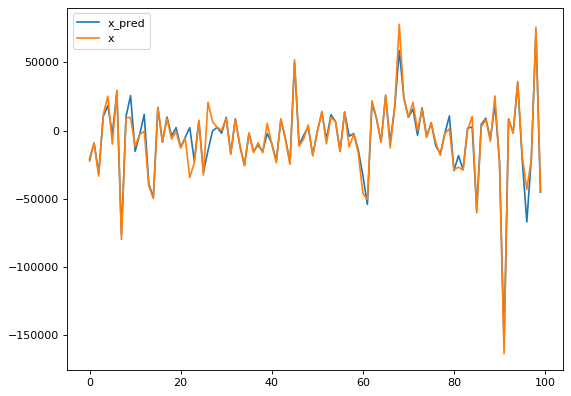

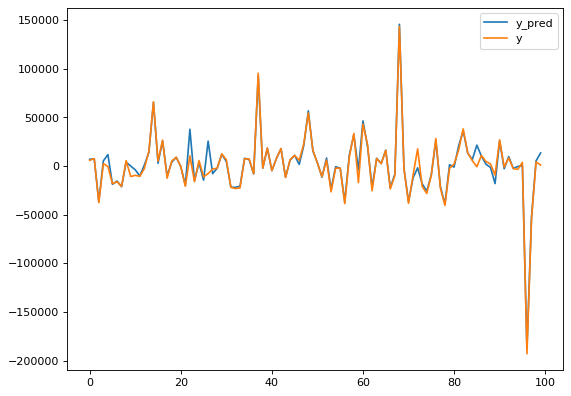

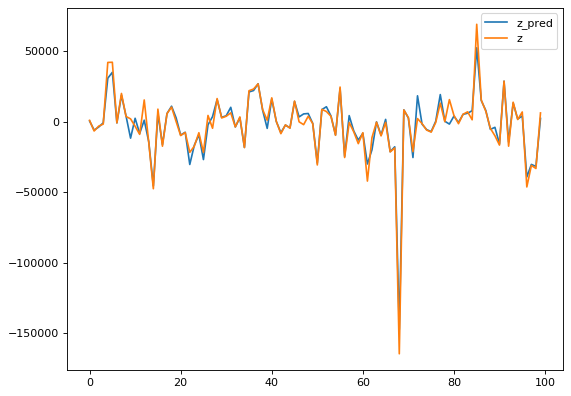

In [19]:
for i in label:
    figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
    plt.plot('index',i+'_pred', data=train_mydata.iloc[0:100,:])
    plt.plot('index',i, data=train_mydata.iloc[0:100,:])
#     plt.plot('index',i+'_sim', data=train_mydata.iloc[0:100,:])
#     plt.plot('index',i+'_pred', data=train_mydata.iloc[0:100,:])
    plt.legend()

/Users/bytedance-it138302/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: Second argument 'x' is ambiguous: could be a color spec but is in data; using as data.  Either rename the entry in data or use three arguments to plot.
  after removing the cwd from sys.path.
/Users/bytedance-it138302/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: Second argument 'y' is ambiguous: could be a color spec but is in data; using as data.  Either rename the entry in data or use three arguments to plot.
  after removing the cwd from sys.path.


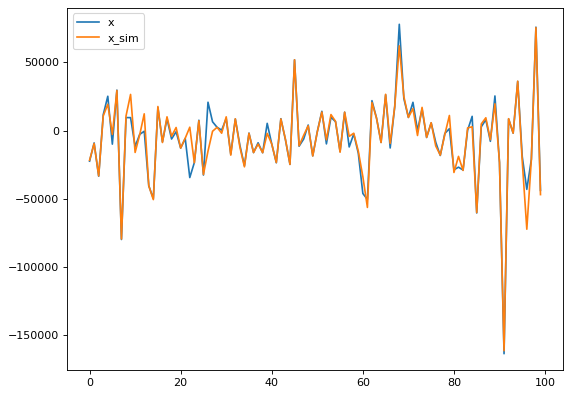

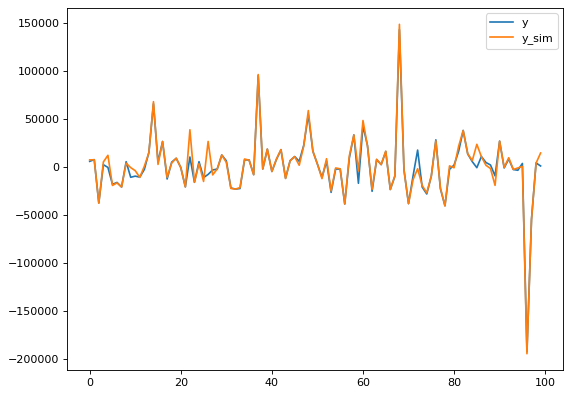

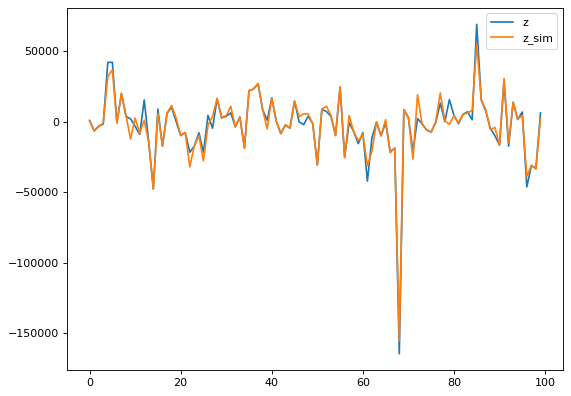

In [20]:
for i in label:
    figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
#     plt.plot('index',i+'_pred', data=train_mydata.iloc[0:100,:])
    plt.plot('index',i, data=train_mydata.iloc[0:100,:])
    plt.plot('index',i+'_sim', data=train_mydata.iloc[0:100,:])
#     plt.plot('index',i+'_pred', data=train_mydata.iloc[0:100,:])
    plt.legend()

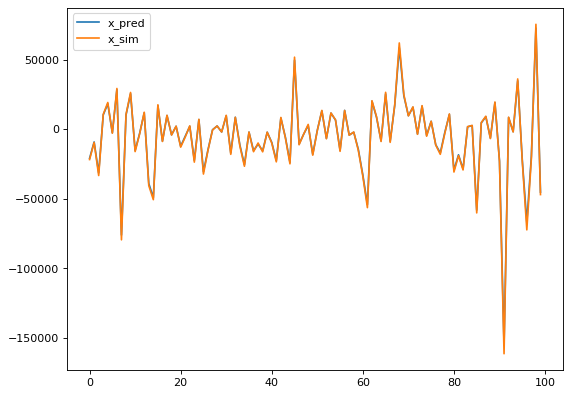

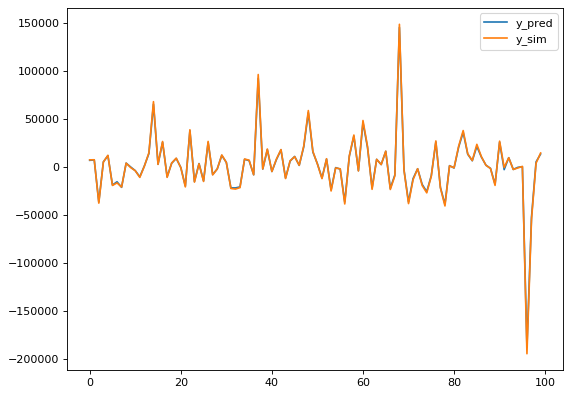

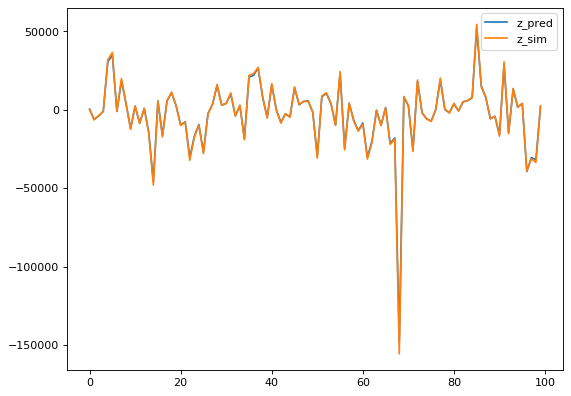

In [21]:
for i in label:
    figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
    plt.plot('index',i+'_pred', data=train_mydata.iloc[0:100,:])
#     plt.plot('index',i, data=train_mydata.iloc[0:100,:])
    plt.plot('index',i+'_sim', data=train_mydata.iloc[0:100,:])
#     plt.plot('index',i+'_pred', data=train_mydata.iloc[0:100,:])
    plt.legend()

/Users/bytedance-it138302/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: Second argument 'x' is ambiguous: could be a color spec but is in data; using as data.  Either rename the entry in data or use three arguments to plot.
  after removing the cwd from sys.path.
/Users/bytedance-it138302/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: Second argument 'y' is ambiguous: could be a color spec but is in data; using as data.  Either rename the entry in data or use three arguments to plot.
  after removing the cwd from sys.path.


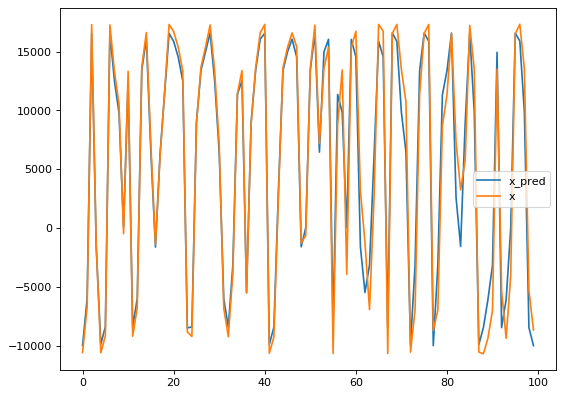

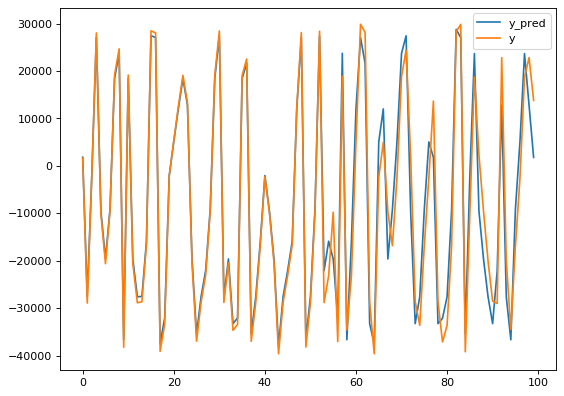

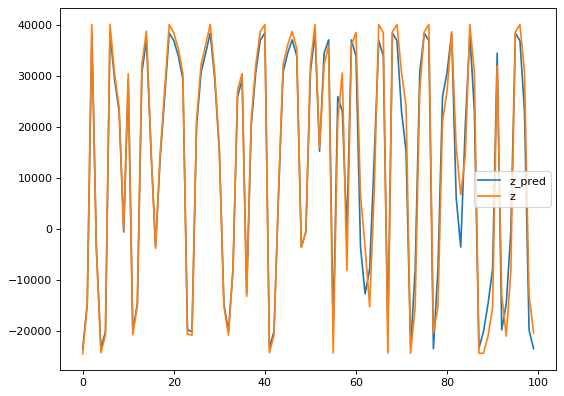

In [22]:
for i in label:
    figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
    plt.plot('index',i+'_pred', data=test_mydata.iloc[0:100,:])
    plt.plot('index',i, data=test_mydata.iloc[0:100,:])
#     plt.plot('index',i+'_sim', data=testmydata.iloc[0:100,:])
#     plt.plot('index',i+'_pred', data=test_mydata.iloc[0:100,:])
    plt.legend()

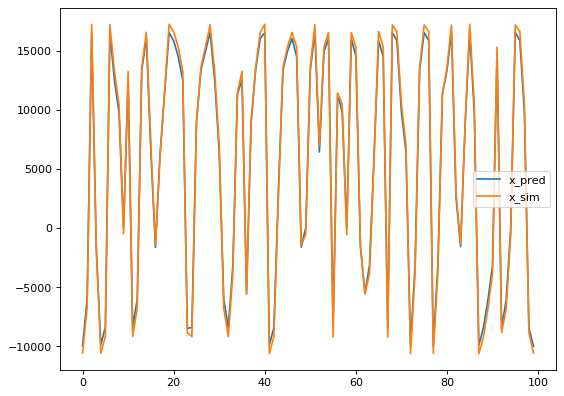

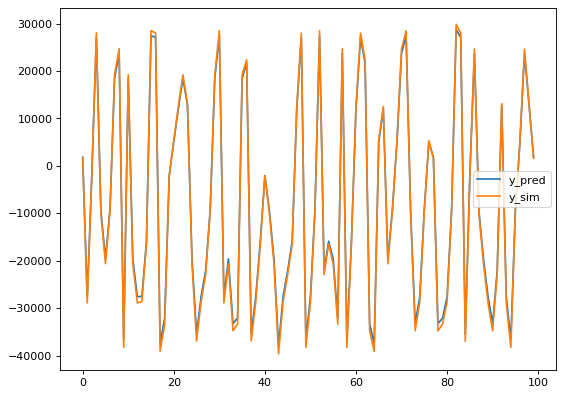

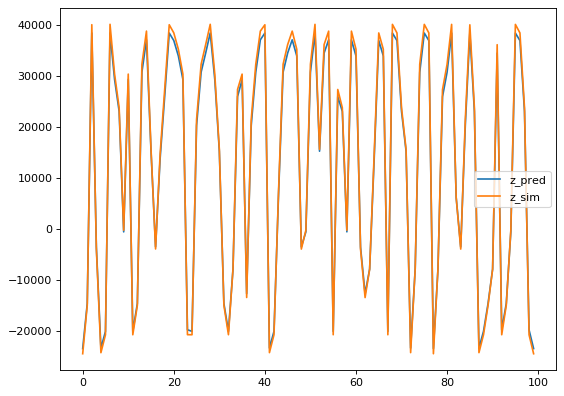

In [23]:
for i in label:
    figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
    plt.plot('index',i+'_pred', data=test_mydata.iloc[0:100,:])
#     plt.plot('index',i, data=test_mydata.iloc[0:100,:])
    plt.plot('index',i+'_sim', data=test_mydata.iloc[0:100,:])
#     plt.plot('index',i+'_pred', data=test_mydata.iloc[0:100,:])
    plt.legend()

/Users/bytedance-it138302/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: Second argument 'x' is ambiguous: could be a color spec but is in data; using as data.  Either rename the entry in data or use three arguments to plot.
  after removing the cwd from sys.path.
/Users/bytedance-it138302/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: Second argument 'y' is ambiguous: could be a color spec but is in data; using as data.  Either rename the entry in data or use three arguments to plot.
  after removing the cwd from sys.path.


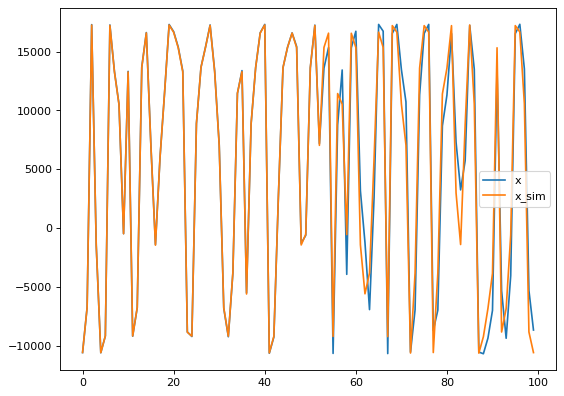

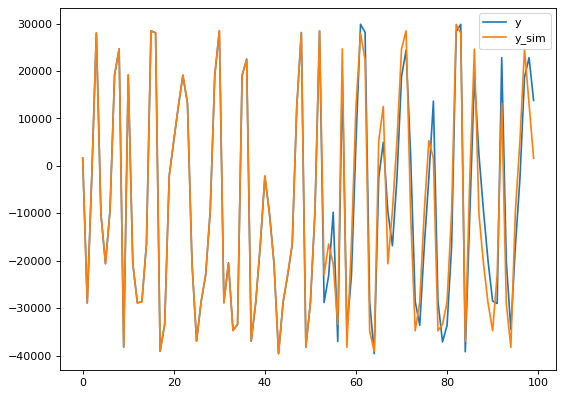

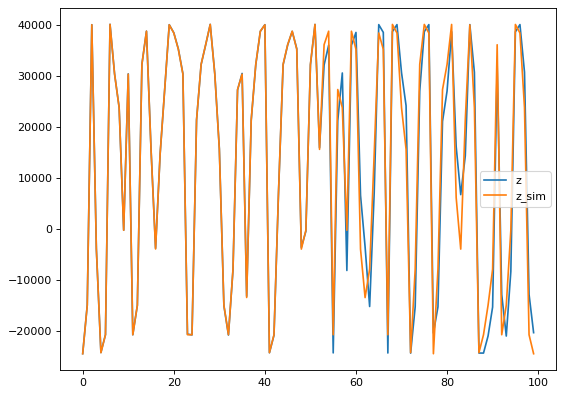

In [24]:
for i in label:
    figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
#     plt.plot('index',i+'_pred', data=test_mydata.iloc[0:100,:])
    plt.plot('index',i, data=test_mydata.iloc[0:100,:])
    plt.plot('index',i+'_sim', data=test_mydata.iloc[0:100,:])
#     plt.plot('index',i+'_pred', data=test_mydata.iloc[0:100,:])
    plt.legend()

/Users/bytedance-it138302/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: Second argument 'x' is ambiguous: could be a color spec but is in data; using as data.  Either rename the entry in data or use three arguments to plot.
  
/Users/bytedance-it138302/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: Second argument 'x' is ambiguous: could be a color spec but is in data; using as data.  Either rename the entry in data or use three arguments to plot.
  # Remove the CWD from sys.path while we load stuff.
/Users/bytedance-it138302/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: Second argument 'y' is ambiguous: could be a color spec but is in data; using as data.  Either rename the entry in data or use three arguments to plot.
  
/Users/bytedance-it138302/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: Second argument 'y' is ambiguous: could be a color spec but is

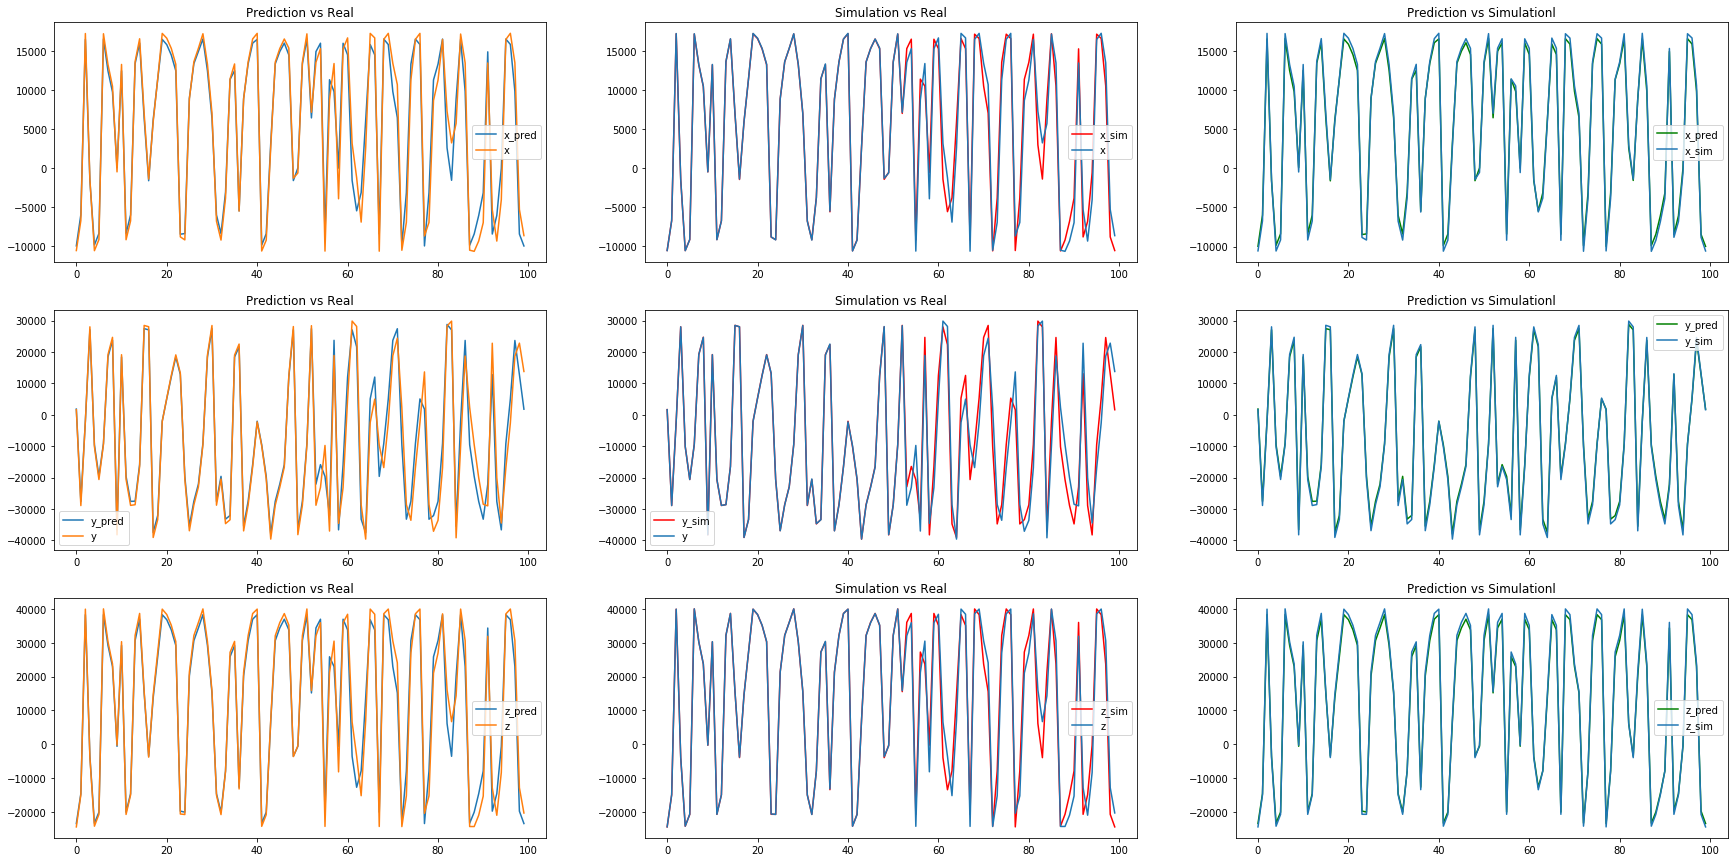

In [25]:
# figure(num=None, figsize=(20, 15), dpi=80, facecolor='w', edgecolor='k')
fig, axs = plt.subplots(3, 3, figsize=(30, 15))
c=0
for i in label:
    axs[c, 0].plot('index',i+'_pred', data=test_mydata.iloc[0:100,:])
    axs[c, 0].plot('index',i, data=test_mydata.iloc[0:100,:])
    axs[c, 0].set_title('Prediction vs Real')
    axs[c, 0].legend()
    axs[c, 1].plot('index',i+'_sim', data=test_mydata.iloc[0:100,:], color='red')
    axs[c, 1].plot('index',i, data=test_mydata.iloc[0:100,:])
    axs[c, 1].set_title('Simulation vs Real')
    axs[c, 1].legend()
    axs[c, 2].plot('index',i+'_pred', data=test_mydata.iloc[0:100,:],  color='green')
    axs[c, 2].plot('index',i+'_sim', data=test_mydata.iloc[0:100,:])
    axs[c, 2].set_title('Prediction vs Simulationl')
    axs[c, 2].legend()  
    c+=1

#     for ax in axs.flat:
#         ax.set(xlabel='x-label', ylabel='y-label')

#     # Hide x labels and tick labels for top plots and y ticks for right plots.
#     for ax in axs.flat:
#         ax.label_outer()

In [26]:
test_mydata.head()

,x,y,z,x_sim,y_sim,z_sim,x_pred,y_pred,z_pred,index
id,,,,,,,,,,
1,-10567.672384,1619.746066,-24451.813271,-10555.500066,1649.289367,-24473.089556,-9968.351935,1825.372065,-23461.885425,0
4,-6719.092336,-28929.061629,-14938.907967,-6729.358857,-28902.271436,-14992.399986,-5974.950104,-27584.655337,-14636.076585,1
15,17281.246143,-2011.121378,39970.739873,17241.395285,-2016.770194,39958.759155,16523.236777,-1997.123319,38331.418186,2
22,-1447.724638,28032.228987,-3918.192838,-1461.093061,28026.085525,-3959.767549,-1619.389094,27083.613896,-3543.884468,3
26,-10583.521489,-10145.003880,-24243.775722,-10574.016380,-10147.909472,-24270.149411,-9849.778000,-9515.035777,-23371.972826,4


In [30]:
def smape(satellite_predicted_values, satellite_true_values):
    return np.mean(np.abs((satellite_predicted_values - satellite_true_values)/(np.abs(satellite_predicted_values) + np.abs(satellite_true_values))))

In [31]:
for i in label:
    print('smape real vs sim : %f, smape real vs prediction : %f ' %(smape(test_mydata[i], test_mydata[i+'_sim']), smape(test_mydata[i], test_mydata[i+'_pred'])))

smape real vs sim : 0.182732, smape real vs prediction : 0.190678 
smape real vs sim : 0.186034, smape real vs prediction : 0.195309 
smape real vs sim : 0.183391, smape real vs prediction : 0.200647 


In [32]:
for i in ['_sim', '_pred']:
    real=np.array(test_mydata[label])
    compare=np.array(test_mydata[[j+i for j in label]])
    print('smape real vs %s : %f' %(i, smape(real, compare)))

smape real vs _sim : 0.184052
smape real vs _pred : 0.195545
